In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import time
from skbio.diversity import beta_diversity
from skbio.stats.distance import DistanceMatrix
from skbio.stats.ordination import pcoa
from skbio.stats.distance import permanova
from skbio.stats.distance import bioenv
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats
from scipy.stats import f_oneway
from scipy.stats import mstats
import matplotlib.pyplot as plt

In [2]:
bc_df = pd.read_csv('../QIIME2/core-metrics-results-paired/exported-bray-curtis/distance-matrix.tsv', sep = '\t', index_col=0)
bc_df

,L1,L10,L100,L101,L102,L103,L104,L105,L106,L107,...,L9,L90,L91,L93,L94,L95,L96,L97,L98,L99
L1,0.000,0.605,0.274,0.884,0.246,0.424,0.683,0.888,0.732,0.721,...,0.578,0.512,0.856,0.441,0.472,0.618,0.239,0.310,0.274,0.217
L10,0.605,0.000,0.641,0.938,0.573,0.631,0.806,0.752,0.726,0.746,...,0.385,0.434,0.927,0.665,0.652,0.648,0.556,0.637,0.573,0.630
L100,0.274,0.641,0.000,0.941,0.271,0.417,0.870,0.899,0.833,0.765,...,0.650,0.638,0.969,0.482,0.636,0.641,0.203,0.379,0.151,0.317
L101,0.884,0.938,0.941,0.000,0.900,0.881,0.859,0.619,0.819,0.716,...,0.901,0.887,0.774,0.733,0.883,0.680,0.912,0.717,0.933,0.785
L102,0.246,0.573,0.271,0.900,0.000,0.422,0.764,0.909,0.725,0.704,...,0.645,0.559,0.922,0.478,0.601,0.634,0.178,0.370,0.203,0.303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
L95,0.618,0.648,0.641,0.680,0.634,0.581,0.861,0.784,0.772,0.679,...,0.676,0.668,0.728,0.482,0.636,0.000,0.619,0.504,0.666,0.553
L96,0.239,0.556,0.203,0.912,0.178,0.425,0.768,0.885,0.753,0.708,...,0.622,0.550,0.930,0.468,0.583,0.619,0.000,0.363,0.134,0.290
L97,0.310,0.637,0.379,0.717,0.370,0.363,0.781,0.682,0.770,0.691,...,0.622,0.551,0.835,0.281,0.553,0.504,0.363,0.000,0.401,0.288
L98,0.274,0.573,0.151,0.933,0.203,0.428,0.846,0.909,0.775,0.772,...,0.649,0.565,0.939,0.489,0.620,0.666,0.134,0.401,0.000,0.312


In [3]:
jac_df = pd.read_csv('../QIIME2/core-metrics-results-paired/exported-jaccard/distance-matrix.tsv', sep = '\t', index_col=0)
jac_df

,L1,L10,L100,L101,L102,L103,L104,L105,L106,L107,...,L9,L90,L91,L93,L94,L95,L96,L97,L98,L99
L1,0.000000,0.703704,0.729167,0.818182,0.686275,0.755102,0.696203,0.905882,0.676471,0.830357,...,0.685185,0.666667,0.867347,0.824324,0.754098,0.802632,0.686275,0.797101,0.744681,0.634921
L10,0.703704,0.000000,0.849057,0.844444,0.781818,0.826923,0.829545,0.931034,0.767123,0.880342,...,0.685185,0.812500,0.890000,0.855263,0.812500,0.848101,0.686275,0.863014,0.795918,0.771429
L100,0.729167,0.849057,0.000000,0.855422,0.791667,0.666667,0.810127,0.909091,0.734375,0.880734,...,0.760000,0.803571,0.891304,0.869565,0.803571,0.891892,0.791667,0.806452,0.780488,0.815385
L101,0.818182,0.844444,0.855422,0.000000,0.797619,0.797468,0.818966,0.730000,0.747475,0.768657,...,0.793103,0.777778,0.821138,0.801980,0.791209,0.774510,0.768293,0.741935,0.822785,0.666667
L102,0.686275,0.781818,0.791667,0.797619,0.000000,0.765957,0.750000,0.965517,0.720588,0.857143,...,0.785714,0.762712,0.897959,0.880000,0.741379,0.842105,0.608696,0.840580,0.727273,0.761194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
L95,0.802632,0.848101,0.891892,0.774510,0.842105,0.828571,0.902655,0.787234,0.793478,0.812500,...,0.805195,0.802469,0.754717,0.714286,0.831325,0.000000,0.810811,0.716049,0.888889,0.710843
L96,0.686275,0.686275,0.791667,0.768293,0.608696,0.765957,0.717949,0.902439,0.681818,0.857143,...,0.716981,0.762712,0.920000,0.864865,0.762712,0.810811,0.000000,0.823529,0.697674,0.723077
L97,0.797101,0.863014,0.806452,0.741935,0.840580,0.724138,0.851485,0.722892,0.829545,0.809917,...,0.707692,0.728571,0.784314,0.666667,0.746479,0.716049,0.823529,0.000000,0.857143,0.643836
L98,0.744681,0.795918,0.780488,0.822785,0.727273,0.717949,0.805195,0.935065,0.746032,0.888889,...,0.775510,0.773585,0.913043,0.865672,0.773585,0.888889,0.697674,0.857143,0.000000,0.770492


In [4]:
mapping_file = pd.read_csv('../QIIME2.2/mapping_file/mapping_file.csv', index_col=0)
mapping_file = mapping_file[mapping_file.index.isin(bc_df.index)]
mapping_file.loc['L124','Fe'] = np.nan
mapping_file

,genotype_1,fertility_1,amf,rep_1,group_1,shoot_mass,root_mass,total_mass,ratio_root_to_shoot,root_colonization,...,G_5,FERT_5,AMF,REP_5,group_5,Length,AvgDiam,Forks,SurfArea,Origin
#SampleID,,,,,,,,,,,,,,,,,,,,,
L1,1,P,Y,1,Common (C. dactylon),29.961,4.46,34.421,0.129572,43,...,1,P,Y,1,Common (C. dactylon),162.8464,0.2905,904.0,14.8643,African
L10,1,PPP,Y,2,Common (C. dactylon),26.283,10.16,36.443,0.278792,36,...,1,PPP,Y,2,Common (C. dactylon),329.7942,0.2978,2620.0,30.8595,African
L100,9,PP,Y,5,Common (C. dactylon),18.142,6.82,24.962,0.273215,21,...,9,PP,Y,5,Common (C. dactylon),229.4975,0.3495,1577.0,25.1969,Asian
L101,9,PP,Y,1,Common (C. dactylon),25.649,10.88,36.529,0.297846,26,...,9,PP,Y,1,Common (C. dactylon),216.1839,0.3708,1395.0,25.1835,Asian
L102,9,PP,Y,2,Common (C. dactylon),25.664,12.66,38.324,0.330341,39,...,9,PP,Y,2,Common (C. dactylon),302.0509,0.2743,1827.0,26.0297,Asian
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
L95,8,PPP,Y,4,Hybrid (C. transvaalensis),22.510,8.57,31.080,0.275740,40,...,8,PPP,Y,4,Hybrid (C. transvaalensis),106.4580,0.3194,150.0,10.6812,African
L96,9,P,Y,5,Common (C. dactylon),18.365,8.69,27.055,0.321198,31,...,9,P,Y,5,Common (C. dactylon),357.6942,0.2741,2434.0,30.8066,Asian
L97,9,P,Y,1,Common (C. dactylon),20.526,5.16,25.686,0.200888,36,...,9,P,Y,1,Common (C. dactylon),213.3945,0.3306,1244.0,22.1649,Asian


In [5]:
mapping_file.columns.values

array(['genotype_1', 'fertility_1', 'amf', 'rep_1', 'group_1',
       'shoot_mass', 'root_mass', 'total_mass', 'ratio_root_to_shoot',
       'root_colonization', 'genotype_2`', 'fertility_2', 'rep_2',
       'total_biomass_esponse', 'root_biomass_response',
       'shoot_biomass_response', 'genotype_4', 'fertility_4', 'inoculum',
       'rep_4', 'TN', 'P', 'Ca', 'K', 'Mg', 'Na', 'S', 'B', 'Fe', 'Zn',
       'Cu', 'Mn', 'G_5', 'FERT_5', 'AMF', 'REP_5', 'group_5', 'Length',
       'AvgDiam', 'Forks', 'SurfArea', 'Origin'], dtype=object)

In [6]:
full_pc_bc = pcoa(bc_df)
full_pc_jac = pcoa(jac_df)

/home/bostevens/anaconda3/envs/py36/lib/python3.6/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:152: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.29180131013876365 and the largest is 13.180365280251728.
  RuntimeWarning
/home/bostevens/anaconda3/envs/py36/lib/python3.6/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:152: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more

In [7]:
plotting_df = mapping_file.copy()
plotting_df = plotting_df[plotting_df.index.isin(bc_df.index)]
plotting_df['PCA1_bc'] = full_pc_bc.samples['PC1'].values
plotting_df['PCA2_bc'] = full_pc_bc.samples['PC2'].values
plotting_df['PCA3_bc'] = full_pc_bc.samples['PC3'].values
plotting_df['PCA1_jac'] = full_pc_jac.samples['PC1'].values
plotting_df['PCA2_jac'] = full_pc_jac.samples['PC2'].values
plotting_df['PCA3_jac'] = full_pc_jac.samples['PC3'].values

In [8]:
mapping_file.head()

,genotype_1,fertility_1,amf,rep_1,group_1,shoot_mass,root_mass,total_mass,ratio_root_to_shoot,root_colonization,...,G_5,FERT_5,AMF,REP_5,group_5,Length,AvgDiam,Forks,SurfArea,Origin
#SampleID,,,,,,,,,,,,,,,,,,,,,
L1,1,P,Y,1,Common (C. dactylon),29.961,4.46,34.421,0.129572,43,...,1,P,Y,1,Common (C. dactylon),162.8464,0.2905,904.0,14.8643,African
L10,1,PPP,Y,2,Common (C. dactylon),26.283,10.16,36.443,0.278792,36,...,1,PPP,Y,2,Common (C. dactylon),329.7942,0.2978,2620.0,30.8595,African
L100,9,PP,Y,5,Common (C. dactylon),18.142,6.82,24.962,0.273215,21,...,9,PP,Y,5,Common (C. dactylon),229.4975,0.3495,1577.0,25.1969,Asian
L101,9,PP,Y,1,Common (C. dactylon),25.649,10.88,36.529,0.297846,26,...,9,PP,Y,1,Common (C. dactylon),216.1839,0.3708,1395.0,25.1835,Asian
L102,9,PP,Y,2,Common (C. dactylon),25.664,12.66,38.324,0.330341,39,...,9,PP,Y,2,Common (C. dactylon),302.0509,0.2743,1827.0,26.0297,Asian


<AxesSubplot:xlabel='Genotype', ylabel='Genotype'>

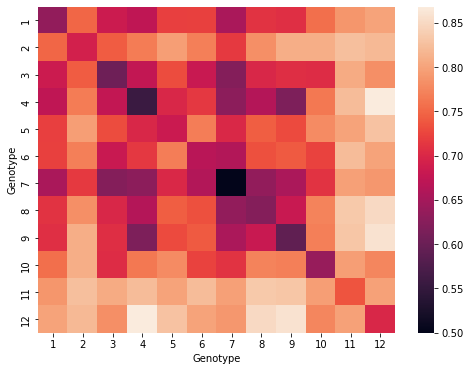

In [9]:
plt.rcParams["figure.figsize"] = (8,6)
tmp_df = bc_df.copy()
tmp_df['Genotype'] = mapping_file['genotype_1']
tmp_df2 = tmp_df.groupby('Genotype').mean()
tmp_df2 = tmp_df2.T
tmp_df2['Genotype'] = mapping_file['genotype_1']
tmp_df2 = tmp_df2.groupby('Genotype').mean()
sns.heatmap(tmp_df2)
# plt.savefig('../Figures/bc_heatmap.jpg', bbox_inches = 'tight', dpi = 300)

In [22]:
genotypes_list = tmp_df['Genotype'].values
beta_div_dict = dict.fromkeys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13])
for i, sample in enumerate(tmp_df.columns[:-1]):
    for j, sample_2 in enumerate(tmp_df.index):
        if tmp_df.loc[sample, sample_2] == 0:
            pass
        elif genotypes_list[i] == genotypes_list[j]:
            if beta_div_dict[genotypes_list[i]] == None:
                beta_div_dict[genotypes_list[i]] = [tmp_df.iloc[i,j]]
            else:
                beta_div_dict[genotypes_list[i]].append(tmp_df.iloc[i,j])
        else:
            if beta_div_dict[13] == None:
                beta_div_dict[13] = [tmp_df.iloc[i,j]]
            else:
                beta_div_dict[13].append(tmp_df.iloc[i,j])

In [30]:
genotype_column_list = []
beta_value = []
for genotype in beta_div_dict.keys():
    genotype_column_list.extend([genotype] * len(beta_div_dict[genotype]))
    beta_value.extend(beta_div_dict[genotype])

In [33]:
genotype_beta_div_df = pd.DataFrame(data = {'Genotype':genotype_column_list, 'Beta diversity': beta_value})

(0.0, 1.0)

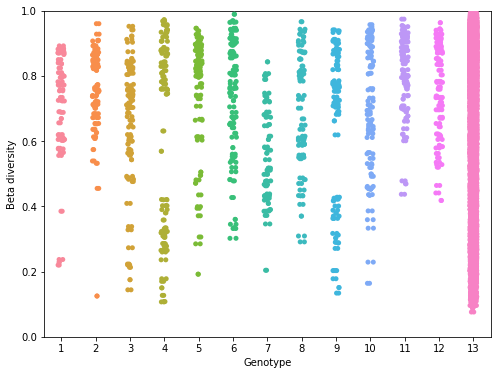

In [56]:
sns.stripplot(y = 'Beta diversity', x = 'Genotype', data = genotype_beta_div_df, dodge = True)
plt.ylim(0, 1)

In [68]:
hs = []
pvals = []
for i in range(1, 13):
    anova_df = genotype_beta_div_df[genotype_beta_div_df['Genotype'].isin([i, 13])]
    anova_df.columns =['Genotype','Beta_diversity']
#     mod = ols('Genotype ~ Beta_diversity',data=anova_df).fit()
#     print(i)
#     results = sm.stats.anova_lm(mod, typ=1)
    H, pval = mstats.kruskalwallis(anova_df[anova_df['Genotype'] == i]['Beta_diversity'].values, 
                                   anova_df[anova_df['Genotype'] == 13]['Beta_diversity'].values)
#     print(round(results['F'][0],2), round(results['PR(>F)'][0], 4)) 
#     print(round(H,2), round(pval, 4))
    hs.append(H)
    pvals.append(pval)

In [70]:
pd.DataFrame(data = {'H': hs, 'P value':pvals}).to_csv('../Data/kw_output_genotype.csv')

In [72]:
tmp_df['Genotype'] = mapping_file['Origin']
genotypes_list = tmp_df['Genotype'].values
beta_div_dict = dict.fromkeys(['Asian','African','Other'])
for i, sample in enumerate(tmp_df.columns[:-1]):
    for j, sample_2 in enumerate(tmp_df.index):
        if tmp_df.loc[sample, sample_2] == 0:
            pass
        elif genotypes_list[i] == genotypes_list[j]:
            if beta_div_dict[genotypes_list[i]] == None:
                beta_div_dict[genotypes_list[i]] = [tmp_df.iloc[i,j]]
            else:
                beta_div_dict[genotypes_list[i]].append(tmp_df.iloc[i,j])
        else:
            if beta_div_dict['Other'] == None:
                beta_div_dict['Other'] = [tmp_df.iloc[i,j]]
            else:
                beta_div_dict['Other'].append(tmp_df.iloc[i,j])

In [73]:
genotype_column_list = []
beta_value = []
for genotype in beta_div_dict.keys():
    genotype_column_list.extend([genotype] * len(beta_div_dict[genotype]))
    beta_value.extend(beta_div_dict[genotype])

In [75]:
origin_beta_div_df = pd.DataFrame(data = {'Origin':genotype_column_list, 'Beta diversity': beta_value})

In [80]:
hs = []
pvals = []
for i in ['African','Asian']:
    anova_df = origin_beta_div_df[origin_beta_div_df['Origin'].isin([i, 'Other'])]
    anova_df.columns =['Origin','Beta_diversity']
#     mod = ols('Genotype ~ Beta_diversity',data=anova_df).fit()
#     print(i)
#     results = sm.stats.anova_lm(mod, typ=1)
    H, pval = mstats.kruskalwallis(anova_df[anova_df['Origin'] == i]['Beta_diversity'].values, 
                                   anova_df[anova_df['Origin'] == 'Other']['Beta_diversity'].values)
#     print(round(results['F'][0],2), round(results['PR(>F)'][0], 4)) 
#     print(round(H,2), round(pval, 4))
    hs.append(H)
    pvals.append(pval)

In [81]:
pd.DataFrame(data = {'H': hs, 'P value':pvals}).to_csv('../Data/kw_output_origin.csv')

In [10]:
plotting_df['Origin'] = plotting_df['genotype_1']
plotting_df['Origin'] = plotting_df['Origin'].replace({12:'African',9:'Asian',5:'African',3:'African',1:'African',11:'African',
                                             8:'African',6:'Asian',4:'Asian',2:'Asian',10:'African',7:'Asian'})

In [11]:
treatment_perm = permanova(DistanceMatrix(bc_df), plotting_df['fertility_1'].values, permutations=999)
treatment_perm

method name               PERMANOVA
test statistic name        pseudo-F
sample size                     139
number of groups                  3
test statistic              1.10827
p-value                       0.308
number of permutations          999
Name: PERMANOVA results, dtype: object

In [20]:
treatment_perm = permanova(DistanceMatrix(bc_df), plotting_df['Origin'].values, permutations=999)
treatment_perm

method name               PERMANOVA
test statistic name        pseudo-F
sample size                     139
number of groups                  2
test statistic              3.48991
p-value                       0.003
number of permutations          999
Name: PERMANOVA results, dtype: object

In [10]:
treatment_perm = permanova(DistanceMatrix(bc_df), plotting_df['genotype_1'].values, permutations=999)
treatment_perm

method name               PERMANOVA
test statistic name        pseudo-F
sample size                     139
number of groups                 12
test statistic              2.63054
p-value                       0.001
number of permutations          999
Name: PERMANOVA results, dtype: object

In [21]:
bc_dm = DistanceMatrix(bc_df, ids = bc_df.index)
jac_dm = DistanceMatrix(jac_df, ids = jac_df.index)
categories = ['genotype_1', 'fertility_1','group_1','rep_1']
p_values_bc = []
f_stats_bc = []
p_values_jac = []
f_stats_jac = []
for category in categories:
    treatment_perm = permanova(DistanceMatrix(bc_df), plotting_df[category].values, permutations=999)
    p_values_bc.append(treatment_perm[5])
    f_stats_bc.append(treatment_perm[4])
    treatment_perm = permanova(DistanceMatrix(jac_df), plotting_df[category].values, permutations=999)
    p_values_jac.append(treatment_perm[5])
    f_stats_jac.append(treatment_perm[4])

In [22]:
pd.DataFrame({'BC F':f_stats_bc, 'BC P':p_values_bc, 'Jac F': f_stats_jac, 'Jac P':p_values_jac}, index = categories)

,BC F,BC P,Jac F,Jac P
genotype_1,2.630541,0.001,1.799424,0.001
fertility_1,1.108266,0.308,0.960037,0.619
group_1,1.292616,0.188,1.358316,0.038
rep_1,2.665869,0.001,2.812202,0.001


In [23]:
plotting_df.describe()

,genotype_1,rep_1,shoot_mass,root_mass,total_mass,ratio_root_to_shoot,root_colonization,genotype_2`,rep_2,total_biomass_esponse,...,Length,AvgDiam,Forks,SurfArea,PCA1_bc,PCA2_bc,PCA3_bc,PCA1_jac,PCA2_jac,PCA3_jac
count,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,...,138.000000,138.000000,138.000000,138.000000,1.390000e+02,1.390000e+02,1.390000e+02,1.390000e+02,1.390000e+02,1.390000e+02
mean,6.561151,2.985612,22.475380,13.185612,35.660991,0.357379,32.748201,6.561151,2.985612,-8.227075,...,286.249284,0.326901,2425.195652,28.755913,-4.472841e-17,-7.987216e-18,1.277955e-17,3.354631e-17,-8.386577e-18,3.194886e-18
std,3.460156,1.583363,5.016366,6.282876,9.434676,0.094961,7.812192,3.460156,1.583363,41.954147,...,128.704613,0.059295,1756.974913,12.601177,3.090467e-01,1.744463e-01,1.495220e-01,1.479744e-01,1.227615e-01,1.131271e-01
min,1.000000,1.000000,8.435000,3.880000,18.916000,0.129572,18.000000,1.000000,1.000000,-190.586372,...,28.304600,0.199900,8.000000,3.599800,-5.181626e-01,-3.699343e-01,-3.118882e-01,-2.559342e-01,-3.035949e-01,-2.708064e-01
25%,4.000000,1.500000,18.937000,8.500000,28.495500,0.288102,27.000000,4.000000,1.500000,-30.345197,...,203.687600,0.289000,1337.000000,20.640950,-3.533150e-01,-1.062922e-01,-1.059403e-01,-1.112649e-01,-9.280069e-02,-7.608759e-02
50%,6.000000,2.000000,22.414000,11.420000,34.670000,0.352886,32.000000,6.000000,2.000000,-2.671189,...,264.762000,0.319500,2032.000000,26.947250,1.269249e-01,-1.132637e-02,-1.335112e-02,-3.028908e-02,9.272540e-03,7.124054e-03
75%,10.000000,4.000000,25.927500,16.005000,42.179500,0.422147,37.000000,10.000000,4.000000,20.311335,...,362.991700,0.366050,2980.000000,35.406050,2.657454e-01,1.085373e-01,9.694480e-02,1.132957e-01,9.469683e-02,8.408491e-02
max,12.000000,5.000000,34.354000,33.250000,59.432000,0.602476,57.000000,12.000000,5.000000,60.366725,...,782.742100,0.491500,9352.000000,72.797700,3.745740e-01,4.166516e-01,4.203550e-01,3.550751e-01,2.333427e-01,2.724291e-01


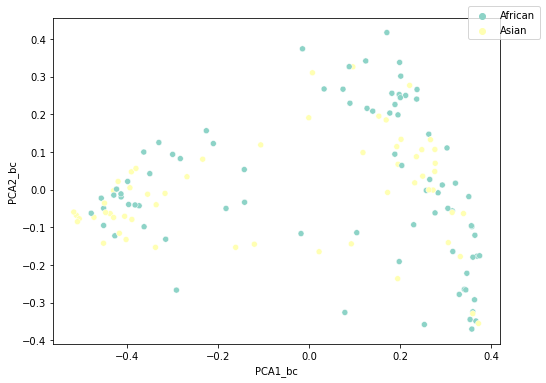

In [24]:
fig = plt.figure()
ax = plt.subplot(111)

sns.scatterplot(x = 'PCA1_bc',y = 'PCA2_bc', data = plotting_df, hue = 'Origin', palette = 'Set3')
ax.legend(bbox_to_anchor=(1.1, 1.05))
# plt.savefig('../Figures/ordination_group.jpg', bbox_inches = 'tight', dpi = 300)

In [15]:
mapping_file.columns.values

array(['genotype_1', 'fertility_1', 'amf', 'rep_1', 'group_1',
       'shoot_mass', 'root_mass', 'total_mass', 'ratio_root_to_shoot',
       'root_colonization', 'genotype_2`', 'fertility_2', 'rep_2',
       'total_biomass_esponse', 'root_biomass_response',
       'shoot_biomass_response', 'genotype_4', 'fertility_4', 'inoculum',
       'rep_4', 'TN', 'P', 'Ca', 'K', 'Mg', 'Na', 'S', 'B', 'Fe', 'Zn',
       'Cu', 'Mn', 'G_5', 'FERT_5', 'AMF', 'REP_5', 'group_5', 'Length',
       'AvgDiam', 'Forks', 'SurfArea'], dtype=object)

In [16]:
variables = ['TN','P', 'Ca', 'K', 'Mg', 'Na', 'S', 'Fe', 'Zn', 'Cu', 'Mn',
       'Length','AvgDiam', 'SurfArea', 'shoot_mass', 'root_mass', 'total_mass', 'ratio_root_to_shoot',
       'root_colonization', 'total_biomass_esponse', 'root_biomass_response', 'shoot_biomass_response']
r2_bc = []
r2_jac = []
for variable in variables:
#     print(variable)
    mapping_file_tmp = mapping_file[[variable]].copy()
    mapping_file_tmp.dropna(inplace = True)
    mapping_file_tmp[variable] = pd.to_numeric(mapping_file_tmp[variable])
    bc_dm_tmp = bc_dm.filter(mapping_file_tmp.index)
    jac_dm_tmp = jac_dm.filter(mapping_file_tmp.index)
    r2_bc.append(bioenv(bc_dm_tmp, mapping_file_tmp[[variable]])['correlation'][0]*100)
    r2_jac.append(bioenv(jac_dm_tmp, mapping_file_tmp[[variable]])['correlation'][0]*100)

In [17]:
corr_df = pd.DataFrame({'BC R2':r2_bc, 'Jac R2':r2_jac}, index = variables)
corr_df.to_csv('../Data/bioenv_corr_df.csv')

In [35]:
corr_df[-3:]

,BC R2,Jac R2
total_biomass_esponse,-0.343162,-0.855718
root_biomass_response,-0.464372,1.025294
shoot_biomass_response,7.379577,5.838229
